In [ ]:
#MBTI column expression 통일
MBTI = ['INFP', 'ISFP', 'INFJ', 'ISFJ', 'ENFP', 'ESFP', 'ENFJ', 'ESFJ', 'INTP', 'ISTP', 'INTJ', 'ISTJ', 'ENTP', 'ESTP', 'ENTJ', 'ESTJ']
for i in range(len(MBTI)):
    df.loc[df['author_flair_text'].str.upper().str.contains(MBTI[i]), "author_flair_text"]= MBTI[i]

In [ ]:
# Random 2700 sampling from each MBTI
df = pd.concat([df[df['author_flair_text'].str.upper().str.contains(MBTI[i])].sample(2700) for i in range(len(MBTI))])

In [ ]:
# [I,E] [N,S] [F,T] [P,J] Label column add 
df['I']= 0
df.loc[df['author_flair_text'].str.upper().str.contains('I'),'I']=1
df['N']=0
df.loc[df['author_flair_text'].str.upper().str.contains('N'),'N']=1
df['F']=0
df.loc[df['author_flair_text'].str.upper().str.contains('F'),'F']=1
df['P']=0
df.loc[df['author_flair_text'].str.upper().str.contains('P'),'P']=1
# df.sample(5)

Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

#Predict
y_pred = model.predict(X_test['input_ids'])



In [ ]:
y_pred_arg = np.argmax(y_pred['logits'], axis=1)

In [ ]:
label = ['INFP', 'ISFP', 'INFJ', 'ISFJ', 'ENFP', 'ESFP', 'ENFJ', 'ESFJ', 'INTP', 'ISTP', 'INTJ', 'ISTJ', 'ENTP', 'ESTP', 'ENTJ', 'ESTJ']


In [ ]:
from sklearn.metrics import confusion_matrix

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_arg)

print(cf_matrix)

[[  2   1   2   0   0   0   1   0   2   0   0   0   0   2   1 529]
 [  0  19   1   0   0   2   0   0   0   0   0   1   0   5   0 512]
 [  0   0   3   1   0   1   0   0   1   0   0   1   1   3   0 529]
 [  0   3   0   2   0   0   0   0   0   0   1   0   0   0   0 534]
 [  0   1   0   0   4   0   0   0   0   0   0   0   0   1   0 534]
 [  0   8   0   0   0   0   0   0   0   0   1   0   0   1   0 530]
 [  1   1   0   0   0   0   8   0   1   0   0   1   0   2   1 525]
 [  0   1   0   0   0   0   1   1   0   0   0   0   0   0   0 537]
 [  1   0   0   0   0   0   1   0   5   0   0   0   0   2   1 530]
 [  2   1   0   0   0   0   1   1   0   2   1   0   0  23   0 509]
 [  1   0   0   0   0   0   0   0   1   0   2   0   0   0   3 533]
 [  0   0   1   0   1   0   1   0   0   0   0   4   0   3   1 529]
 [  1   1   1   0   0   0   1   0   0   0   3   0   2   2   0 529]
 [  0   0   0   0   0   0   1   0   0   0   0   0   1  34   0 504]
 [  0   1   1   0   0   0   0   0   0   1   0   0   0   3   2 

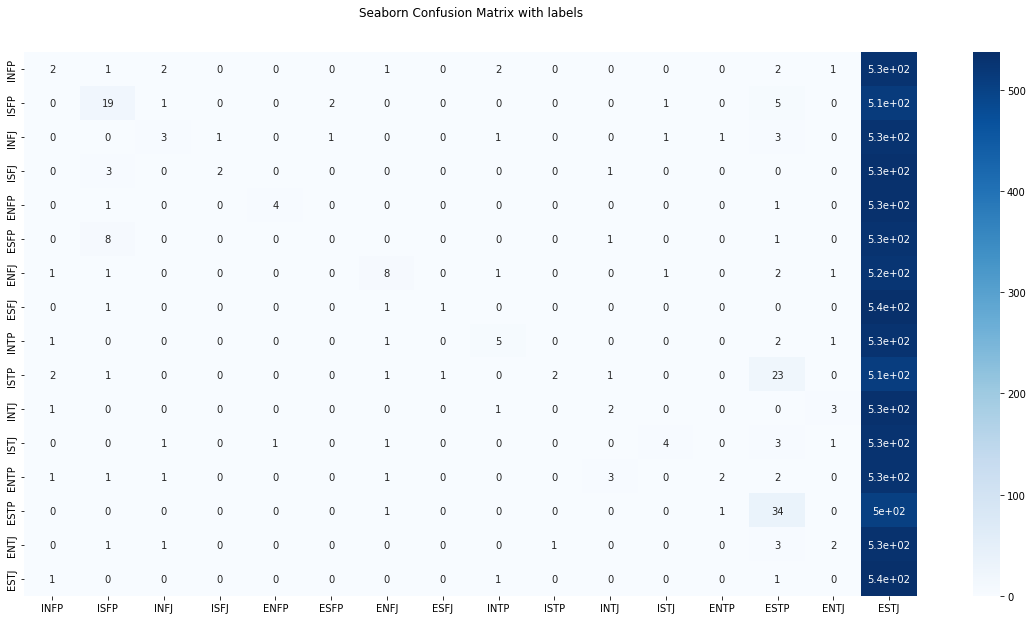

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
# ax.set_xlabel('\nPredicted Flower Category')
# ax.set_ylabel('Actual Flower Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(label)
ax.yaxis.set_ticklabels(label)

## Display the visualization of the Confusion Matrix.
plt.show()